<a href="https://colab.research.google.com/github/AfsanaBrishty/Machine-Learning-and-Deep-Learning-with-Python/blob/main/Logistic_Regression_(Binary_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [ ]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Scatter plot is just to see data distribution.

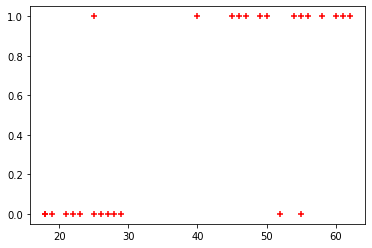

In [ ]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

df.shape theke 27,2 pele er ortho : we have 27 rows and 2 columns.

In [ ]:
df.shape

(27, 2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [ ]:
X_train

,age
11,28
10,18
15,55
21,26
25,54
14,49
12,27
23,45
6,55
16,25


In [ ]:
X_test

,age
22,40
8,62
2,47
17,58
26,23
5,56


In [ ]:
Y_train

11    0
10    0
15    1
21    0
25    1
14    1
12    0
23    1
6     0
16    1
1     0
3     0
20    0
13    0
18    0
9     1
4     1
0     0
24    1
7     1
19    0
Name: bought_insurance, dtype: int64

In [ ]:
Y_test

22    1
8     1
2     1
17    1
26    0
5     1
Name: bought_insurance, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.predict(X_test)

array([0, 1, 1, 1, 0, 1])

In [ ]:
model.score(X_test, Y_test)

0.8333333333333334

The 1st probability is for not buying insurance,
2nd one is the probability for buying insurance.

In [ ]:
model.predict_proba(X_test)

array([[0.54272266, 0.45727734],
       [0.07934436, 0.92065564],
       [0.34003139, 0.65996861],
       [0.12191141, 0.87808859],
       [0.90005723, 0.09994277],
       [0.14981727, 0.85018273]])

In [ ]:
model.predict([[56]])

array([1])

In [ ]:
model.predict([[25]])

array([0])

In [ ]:
model.coef_

array([[0.11920896]])

In [ ]:
model.intercept_

array([-4.9396666])

In logicstic regression 
y = 1/(1+e^(-(m*x+b)))
model.coef_ indicates value of m in y=m*x + b equation
model.intercept_ indicates value of b in y=m*x + b equation

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
def prediction_function(age):
    z = 0.119 * age - 4.939 # 0.11920896 ~ 0.119 and -4.9396666 ~ -4.939
    y = sigmoid(z)
    return y

In [ ]:
age = 35
prediction_function(age)

0.31561446181158487

In [ ]:
age = 43
prediction_function(age)

0.5443828762475714

Exercise Solution

In [ ]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
left = df[df.left==1]
left.shape

(3571, 10)

In [ ]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [ ]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

1) **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
2) **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
3) **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm